In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-stock-data-live-and-latest/FB_stock_history.csv
/kaggle/input/facebook-stock-data-live-and-latest/FB_stock_info.csv


# [🔮🎯📊 Facebook Stock Price Performance Analysis and Data Visualization 📊🎯🔮](#0)


 *  Task-1 Dataset Load  
 *  Task-2 Data Visualization Charts  
 *  Task-3 Statistical Analysis and Inference  
 *  Task-4 Linear Regression and Forecasting 
 *  Task-5 Forecasting using Facebook Prophet Library


<a id=1><h3 >1️⃣ Dataset Loading<br></h3></a>
<a id=2><h3 >2️⃣ Dataset Visualization Using Simple Plots<br></h3></a>
<a id=3><h3 >3️⃣ Dataset Visualization Using MPLFinance Plots<br></h3></a>
<a id=4><h3 >4️⃣ Stock Analysis of the data<br></h3></a>
<a id=4.1><h4 >4️⃣.1️⃣ MACD Forecasting of data using Pandas TA<br></h4></a>
<a id=5><h3 >5️⃣ Let us do a financial ratios calculation using FINTA library <br></h3></a>
<a id=6><h3 >6️⃣ Let us do a financial ratios calculation<br></h3></a>
<a id=7><h3 >7️⃣ Let us do a bit of forecasting using Facebook Prophet Regression <br></h3></a>
<a id=8><h3 >8️⃣ Let us do a Facebook Prophet library<br></h3></a>


In [2]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from math import sqrt

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')


try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc

     |████████████████████████████████| 62 kB 682 kB/s 


/opt/conda/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


# [1️⃣. Dataset Loading](#1)>

In [3]:
#fb = pd.read_csv('../input/facebook-stock-data-live-and-latest/FB_stock_history.csv')
fb = pd.read_csv('../input/facebook-stock-data-live-and-latest/FB_stock_history.csv')
print(fb.head())

         Date       Open       High        Low      Close     Volume  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0  


# [2️⃣. Dataset Visualization Using Simple Plots](#2)


## Initial simple plots using 
* *Pandas Plotting for opening and closing prices*
* *Plotly OHLC (Open-High-Low-Close) Charts*
* *Statistical Moving Average (SMA) Charts*
* *Exponential Moving Average (EMA) Charts*


#### Simple Pandas plots for the price and volume of Facebook Stock

<AxesSubplot:>

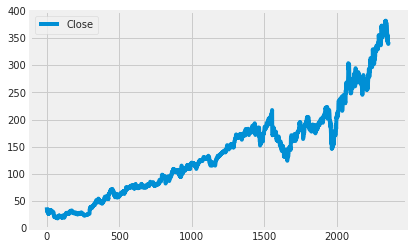

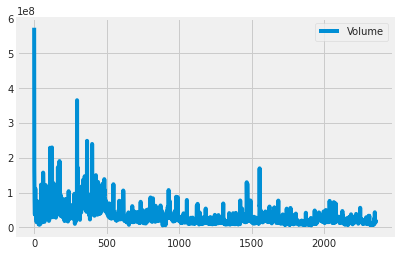

In [4]:
#Closing Price PLot
fb[["Close"]].plot()
#Volume Plot
fb[["Volume"]].plot()

### CAGR Compound Annual Growth Rate (CAGR)

In [5]:
fb2 = pd.read_csv('../input/facebook-stock-data-live-and-latest/FB_stock_history.csv', header=0, 
                  index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], parse_dates=True)
# Get the number of days in `fb`
days = (fb2.index[-1] - fb2.index[0]).days

# Calculate the CAGR 
cagr = ((((fb2['Close'][-1]) / fb2['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Facebook since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Facebook since IPO is  27.94 % per year


### Moving Windows


In [6]:
# Isolate the adjusted closing prices 
adj_close_px = fb2['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-09-20    367.125252
2021-09-21    366.750752
2021-09-22    366.135752
2021-09-23    365.452752
2021-09-24    365.318752
2021-09-27    365.250751
2021-09-28    364.968251
2021-09-29    364.677501
2021-09-30    364.189251
2021-10-01    363.690251
Name: Close, dtype: float64

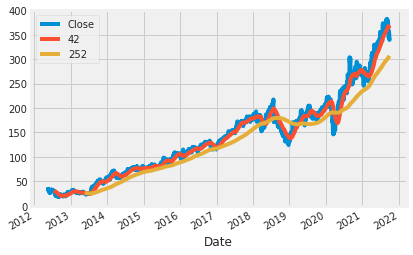

In [7]:
# Short moving window rolling mean
fb2['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
fb2['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
fb2[['Close', '42', '252']].plot()

plt.show()

#### OHLC Chart

In [8]:
#OHLC Plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=fb['Date'],
        open=fb['Open'],
        high=fb['High'],
        low=fb['Low'],
        close=fb['Close']))
fig.show()

### Volatility Calculation

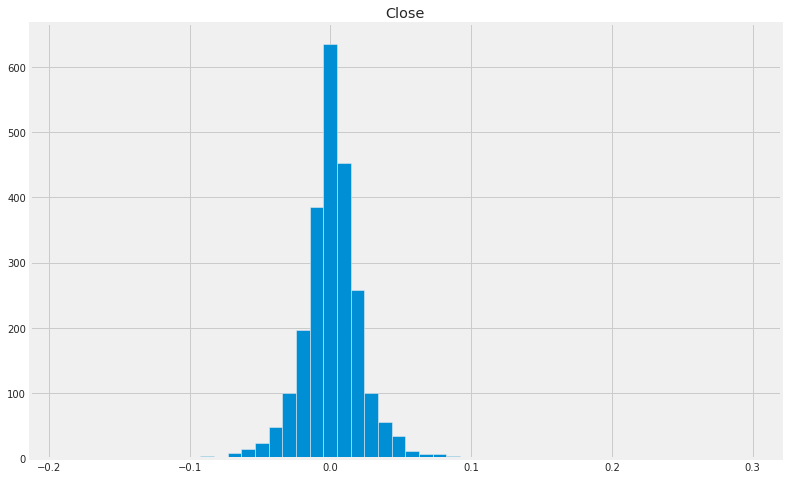

In [9]:
daily_close_px = fb2[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

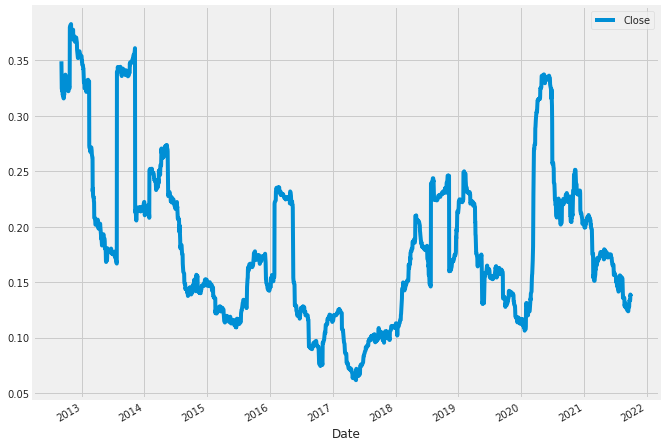

In [10]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

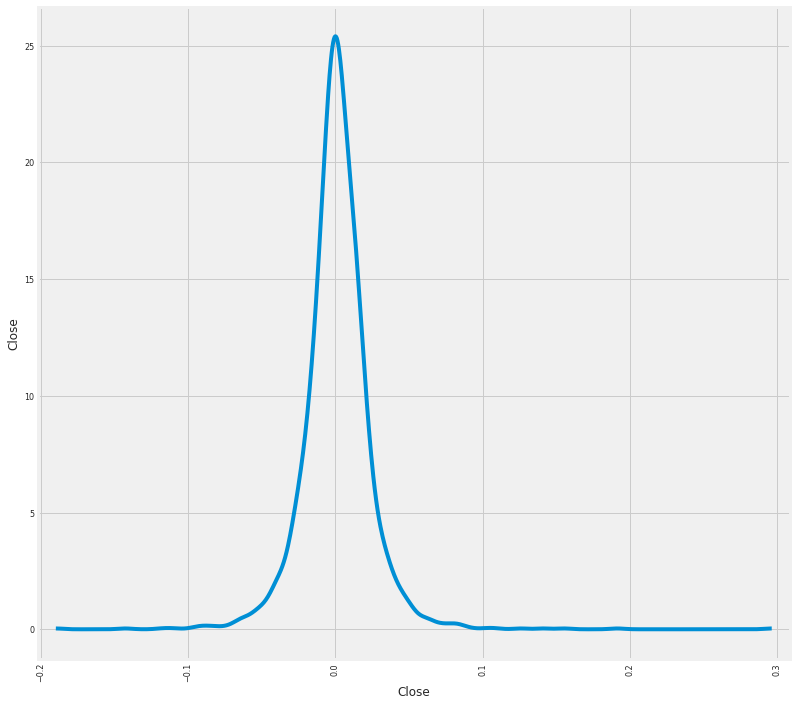

In [11]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

#### SMA chart plotting for 5, 20, 50, 200, 500 day moving averages

In [12]:
fb['SMA5'] = fb.Close.rolling(5).mean()
fb['SMA20'] = fb.Close.rolling(20).mean()
fb['SMA50'] = fb.Close.rolling(50).mean()
fb['SMA200'] = fb.Close.rolling(200).mean()
fb['SMA500'] = fb.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=fb['Date'],
                              open=fb['Open'],
                              high=fb['High'],
                              low=fb['Low'],
                              close=fb['Close'], name = "OHLC"),
                      go.Scatter(x=fb.Date, y=fb.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=fb.Date, y=fb.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=fb.Date, y=fb.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=fb.Date, y=fb.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=fb.Date, y=fb.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

#### EMA chart plotting for 5, 20, 50, 200, 500 day moving averages

In [13]:

fb['EMA5'] = fb.Close.ewm(span=5, adjust=False).mean()
fb['EMA20'] = fb.Close.ewm(span=20, adjust=False).mean()
fb['EMA50'] = fb.Close.ewm(span=50, adjust=False).mean()
fb['EMA200'] = fb.Close.ewm(span=200, adjust=False).mean()
fb['EMA500'] = fb.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=fb['Date'],
                              open=fb['Open'],
                              high=fb['High'],
                              low=fb['Low'],
                              close=fb['Close'], name = "OHLC"),
                      go.Scatter(x=fb.Date, y=fb.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=fb.Date, y=fb.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=fb.Date, y=fb.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=fb.Date, y=fb.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=fb.Date, y=fb.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

#### Reset the index on to the Date column

In [14]:
fb.set_index('Date')

Open        High         Low       Close     Volume  \
Date                                                                    
2012-05-18   42.049999   45.000000   38.000000   38.230000  573576400   
2012-05-21   36.529999   36.660000   33.000000   34.029999  168192700   
2012-05-22   32.610001   33.590000   30.940001   31.000000  101786600   
2012-05-23   31.370001   32.500000   31.360001   32.000000   73600000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2021-09-27  349.809998  355.149994  347.079987  353.579987   15205800   
2021-09-28  347.970001  349.600006  338.920013  340.649994   21710300   
2021-09-29  343.149994  345.230011  338.880005  339.609985   14452200   
2021-09-30  340.450012  342.799988  338.149994  339.390015   16547100   
2021-10-01  341.609985  345.010010  338.640015  343.010010   14789507   

            Dividends  Stock Splits        SMA5       SMA20       SMA50  \
Date                                                                      
2012-05-18          0             0         NaN         NaN         NaN   
2012-05-21          0             0         NaN         NaN         NaN   
2012-05-22          0             0         NaN         NaN         NaN   
2012-05-23          0             0         NaN         NaN         NaN   
2012-05-24          0             0   33.657999         NaN         NaN   
...               ...           ...         ...         ...         ...   
2021-09-27          0             0  350.637994  369.185001  363.680402   
2021-09-28          0             0  347.271991  367.184500  363.754401   
2021-09-29          0             0  346.551990  365.195999  363.713401   
2021-09-30          0             0  345.237994  363.063000  363.576601   
2021-10-01          0             0  343.247998  361.449501  363.413001   

               SMA200     SMA500        EMA5       EMA20       EMA50  \
Date                                                                   
2012-05-18        NaN        NaN   38.230000   38.230000   38.230000   
2012-05-21        NaN        NaN   36.829999   37.829999   38.065294   
2012-05-22        NaN        NaN   34.886666   37.179523   37.788223   
2012-05-23        NaN        NaN   33.924444   36.686235   37.561234   
2012-05-24        NaN        NaN   33.626296   36.338022   37.383539   
...               ...        ...         ...         ...         ...   
2021-09-27  313.83845  260.10736  353.226187  362.725082  360.494530   
2021-09-28  314.15610  260.42990  349.034123  360.622692  359.716313   
2021-09-29  314.48640  260.74822  345.892744  358.621482  358.927829   
2021-09-30  314.81240  261.06764  343.725167  356.789914  358.161641   
2021-10-01  315.14970  261.39816  343.486781  355.477542  357.567459   

                EMA200      EMA500  
Date                                
2012-05-18   38.230000   38.230000  
2012-05-21   38.188208   38.213233  
2012-05-22   38.116684   38.184438  
2012-05-23   38.055821   38.159749  
2012-05-24   38.005813   38.139271  
...                ...         ...  
2021-09-27  322.489730  274.378207  
2021-09-28  322.670430  274.642765  
2021-09-29  322.838982  274.902116  
2021-09-30  323.003669  275.159552  
2021-10-01  323.202737  275.430412  

[2359 rows x 17 columns]

#### Create a column on daily change percentages for the Stock

In [15]:
fb['daily_change_pct'] = fb['Close'].pct_change()*100
fb['returns'] = fb['daily_change_pct'] / fb['Close']  
fb.head()

Date       Open       High        Low      Close     Volume  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   Dividends  Stock Splits       SMA5  SMA20  SMA50  SMA200  SMA500  \
0          0             0        NaN    NaN    NaN     NaN     NaN   
1          0             0        NaN    NaN    NaN     NaN     NaN   
2          0             0        NaN    NaN    NaN     NaN     NaN   
3          0             0        NaN    NaN    NaN     NaN     NaN   
4          0             0  33.657999    NaN    NaN     NaN     NaN   

        EMA5      EMA20      EMA50     EMA200     EMA500  daily_change_pct  \
0  38.230000  38.230000  38.230000  38.230000  38.230000               NaN   
1  36.829999  37.829999  38.065294  38.188208  38.213233        -10.986139   
2  34.886666  37.179523  37.788223  38.116684  38.184438         -8.903905   
3  33.924444  36.686235  37.561234  38.055821  38.159749          3.225806   
4  33.626296  36.338022  37.383539  38.005813  38.139271          3.218746   

    returns  
0       NaN  
1 -0.322837  
2 -0.287223  
3  0.100806  
4  0.097449

#### Create a histogram on the daily changes / percentage

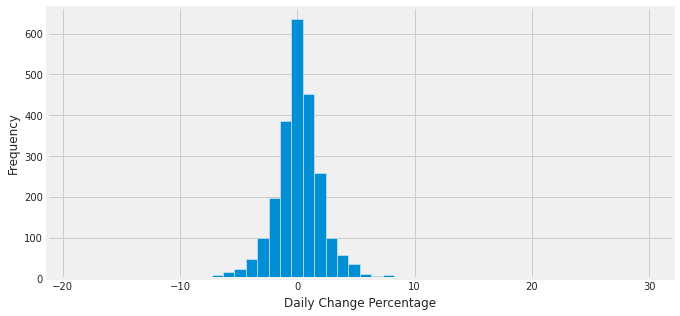

count    2358.000000
mean        0.119665
std         2.318110
min       -18.960922
25%        -0.939562
50%         0.105244
75%         1.217253
max        29.611469
Name: daily_change_pct, dtype: float64

In [16]:
fb['daily_change_pct'].fillna(0)
fb['daily_change_pct'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily Change Percentage')
plt.ylabel('Frequency')
plt.show()
#print the statistics on daily change percentage
fb.daily_change_pct.describe()

#### Plot 7-day rolling averages for volume of stocks traded

<AxesSubplot:>

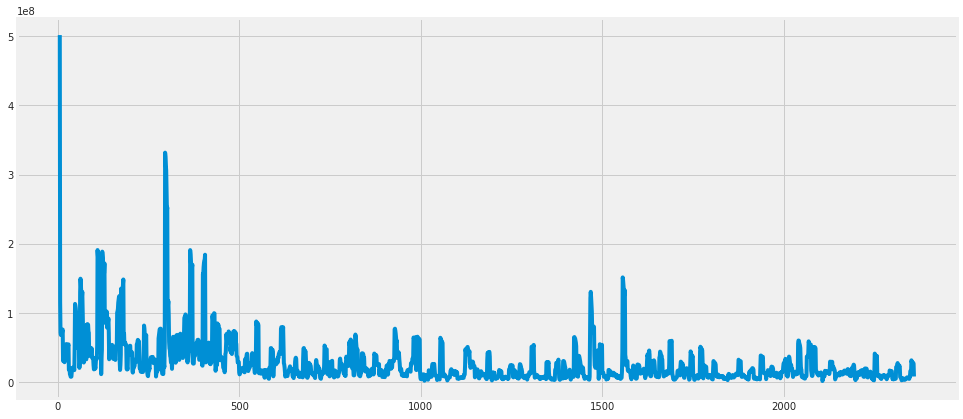

In [17]:
fb_vol = fb['Volume'].rolling(7).std()*np.sqrt(7)
fb_vol.plot(figsize = (15, 7))

#### Define a daily trend function for usage in aggregation

In [18]:
def daily_trend(x):
    if x > -0.5 and x <= 0.5:
        return 'No change'
    elif x > 0.5 and x <= 2:
        return 'Upto 2% Increase'
    elif x > -2 and x <= -0.5:
        return 'Upto 2% Decrease'
    elif x > 2 and x <= 5:
        return '2-5% Increase'
    elif x > -5 and x <= -2:
        return '2-5% Decrease'
    elif x > 5 and x <= 10:
        return '5-10% Increase'
    elif x > -10 and x <= -5:
        return '5-10% Decrease'
    elif x > 10:
        return '>10% Increase'
    elif x <= -10:
        return '>10% Decrease'

#### SMA chart plotting for 5, 20, 50, 200, 500 day moving averages

In [19]:
fb['Trend']= np.zeros(fb['daily_change_pct'].count()+1)
fb['Trend']= fb['daily_change_pct'].apply(lambda x:daily_trend(x))
fb['Trend'].replace('None','No change')
fb.head()

Date       Open       High        Low      Close     Volume  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   Dividends  Stock Splits       SMA5  SMA20  ...  SMA200  SMA500       EMA5  \
0          0             0        NaN    NaN  ...     NaN     NaN  38.230000   
1          0             0        NaN    NaN  ...     NaN     NaN  36.829999   
2          0             0        NaN    NaN  ...     NaN     NaN  34.886666   
3          0             0        NaN    NaN  ...     NaN     NaN  33.924444   
4          0             0  33.657999    NaN  ...     NaN     NaN  33.626296   

       EMA20      EMA50     EMA200     EMA500  daily_change_pct   returns  \
0  38.230000  38.230000  38.230000  38.230000               NaN       NaN   
1  37.829999  38.065294  38.188208  38.213233        -10.986139 -0.322837   
2  37.179523  37.788223  38.116684  38.184438         -8.903905 -0.287223   
3  36.686235  37.561234  38.055821  38.159749          3.225806  0.100806   
4  36.338022  37.383539  38.005813  38.139271          3.218746  0.097449   

            Trend  
0            None  
1   >10% Decrease  
2  5-10% Decrease  
3   2-5% Increase  
4   2-5% Increase  

[5 rows x 21 columns]

#### A Pie & Bar Chart of Daily Percentage change categories

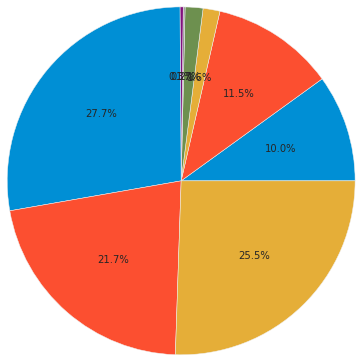

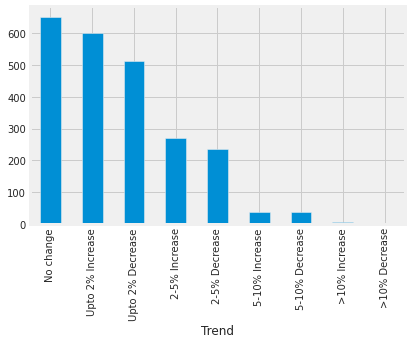

In [20]:

fb_pie_data = fb.groupby('Trend')
#pie_label = fb_pie_data['Trend'].unique()
plt.pie(fb_pie_data['Trend'].count(), #labels = pie_label, 
        autopct = '%1.1f%%', radius = 2 )
plt.show()
ax=fb_pie_data['Trend'].count().sort_values(ascending=False).plot.bar(rot=90)
plt.show()

# [3️⃣. Dataset Visualization Using MPLFinance Plots](#3)


#### General MPLFinance Plot

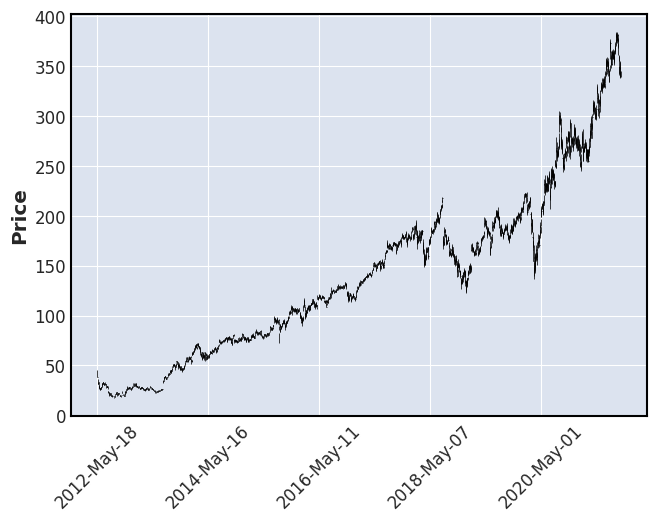

In [21]:
fb.index = pd.DatetimeIndex(fb['Date'])
mpf.plot(fb)

#### CandleStick MPLFinance plot with Moving Averages for (7, 30, 90, 180, 365) days 

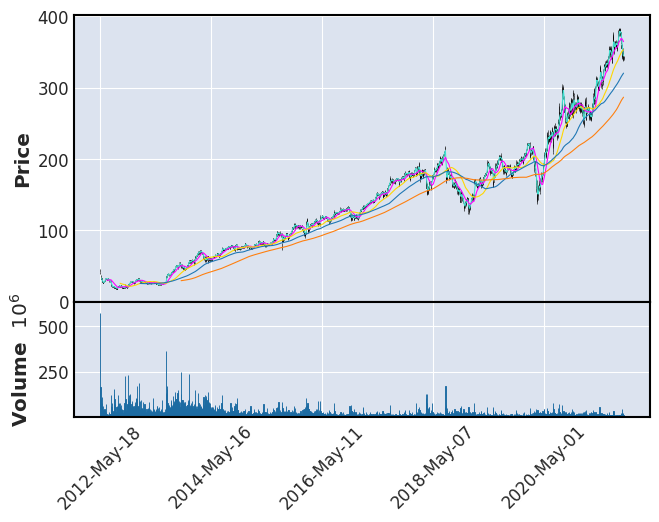

In [22]:
mpf.plot(fb, type='candle', mav = (7, 30, 90, 180, 365), volume = True)

#### Another Candle Stick Plot with Moving Averages and show of non trading days

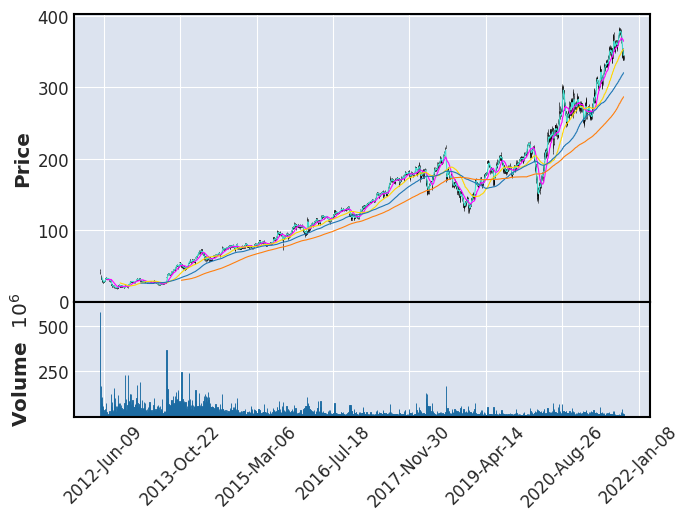

In [23]:
mpf.plot(fb, type='candle', mav = (7, 30, 90, 180, 365), volume = True , show_nontrading = True)

In [24]:
fb.head()

Date       Open       High        Low      Close     Volume  \
Date                                                                            
2012-05-18  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
2012-05-21  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2012-05-22  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
2012-05-23  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
2012-05-24  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

            Dividends  Stock Splits       SMA5  SMA20  ...  SMA200  SMA500  \
Date                                                   ...                   
2012-05-18          0             0        NaN    NaN  ...     NaN     NaN   
2012-05-21          0             0        NaN    NaN  ...     NaN     NaN   
2012-05-22          0             0        NaN    NaN  ...     NaN     NaN   
2012-05-23          0             0        NaN    NaN  ...     NaN     NaN   
2012-05-24          0             0  33.657999    NaN  ...     NaN     NaN   

                 EMA5      EMA20      EMA50     EMA200     EMA500  \
Date                                                                
2012-05-18  38.230000  38.230000  38.230000  38.230000  38.230000   
2012-05-21  36.829999  37.829999  38.065294  38.188208  38.213233   
2012-05-22  34.886666  37.179523  37.788223  38.116684  38.184438   
2012-05-23  33.924444  36.686235  37.561234  38.055821  38.159749   
2012-05-24  33.626296  36.338022  37.383539  38.005813  38.139271   

            daily_change_pct   returns           Trend  
Date                                                    
2012-05-18               NaN       NaN            None  
2012-05-21        -10.986139 -0.322837   >10% Decrease  
2012-05-22         -8.903905 -0.287223  5-10% Decrease  
2012-05-23          3.225806  0.100806   2-5% Increase  
2012-05-24          3.218746  0.097449   2-5% Increase  

[5 rows x 21 columns]

# [4️⃣. Stock Data Analysis using standard techniques](#4)


###### Following is a reuse from the kernel https://www.kaggle.com/datapple/eda-tesla-stock-price-financial-analysis and modified for the analysis

#### Identify the days where the SMA20 is greater than SMA50 and tag the dates.These are target investment dates

In [25]:
fb['Shares'] = [1 if fb.loc[ei, 'SMA20']>fb.loc[ei, 'SMA50'] else 0 for ei in fb.index]

### Tag the dates as profit when the closing price is greater than the preceding date 

#### Plot the dates of wealth generation over the years

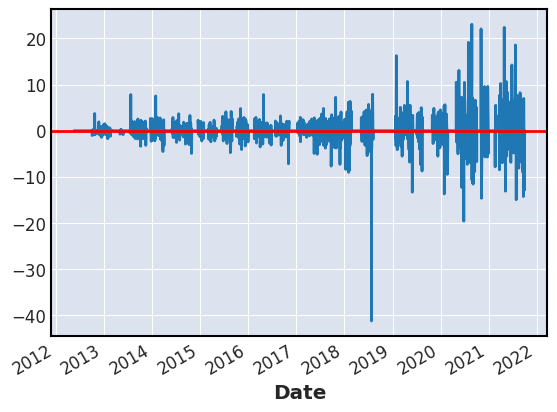

In [26]:
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

#### Calculate the cumulated wealth on the stock

In [27]:
fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

Date        Open        High         Low       Close  \
Date                                                                     
2021-09-27  2021-09-27  349.809998  355.149994  347.079987  353.579987   
2021-09-28  2021-09-28  347.970001  349.600006  338.920013  340.649994   
2021-09-29  2021-09-29  343.149994  345.230011  338.880005  339.609985   
2021-09-30  2021-09-30  340.450012  342.799988  338.149994  339.390015   
2021-10-01  2021-10-01  341.609985  345.010010  338.640015  343.010010   

              Volume  Dividends  Stock Splits        SMA5       SMA20  ...  \
Date                                                                   ...   
2021-09-27  15205800          0             0  350.637994  369.185001  ...   
2021-09-28  21710300          0             0  347.271991  367.184500  ...   
2021-09-29  14452200          0             0  346.551990  365.195999  ...   
2021-09-30  16547100          0             0  345.237994  363.063000  ...   
2021-10-01  14789507          0             0  343.247998  361.449501  ...   

                 EMA50      EMA200      EMA500  daily_change_pct   returns  \
Date                                                                         
2021-09-27  360.494530  322.489730  274.378207          0.175656  0.000497   
2021-09-28  359.716313  322.670430  274.642765         -3.656879 -0.010735   
2021-09-29  358.927829  322.838982  274.902116         -0.305301 -0.000899   
2021-09-30  358.161641  323.003669  275.159552         -0.064772 -0.000191   
2021-10-01  357.567459  323.202737  275.430412          1.066618  0.003110   

                       Trend  Shares      Close1     Profit      wealth  
Date                                                                     
2021-09-27         No change       1  340.649994 -12.929993  236.690002  
2021-09-28     2-5% Decrease       1  339.609985  -1.040009  235.649994  
2021-09-29         No change       1  339.390015  -0.219971  235.430023  
2021-09-30         No change       0  343.010010   0.000000  235.430023  
2021-10-01  Upto 2% Increase       0         NaN   0.000000  235.430023  

[5 rows x 25 columns]

Text(0.5, 1.0, 'Total money made by Facebook Stock (number of times ): 235.4')

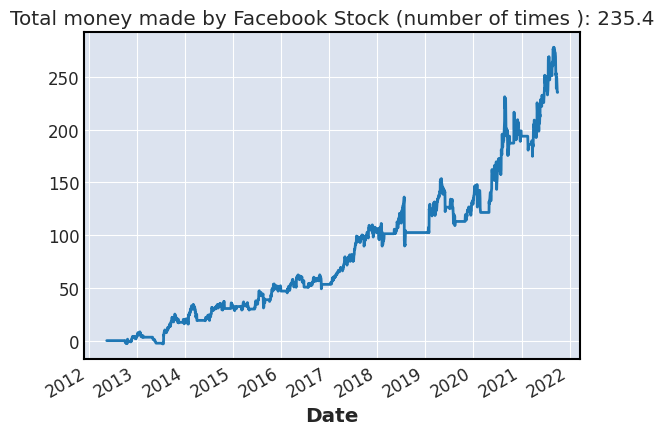

In [28]:
fb['wealth'].plot()
plt.title('Total money made by Facebook Stock (number of times ): {}'.format(round((fb.loc[fb.index[-2], 'wealth']),1)))

#### Calculate the probability of better investment

In [29]:
fb['LogReturn'] = np.log(fb['Close']).shift(-1) - np.log(fb['Close'])
print(fb['LogReturn'])

Date
2012-05-18   -0.116378
2012-05-21   -0.093255
2012-05-22    0.031749
2012-05-23    0.031680
2012-05-24   -0.034497
                ...   
2021-09-27   -0.037254
2021-09-28   -0.003058
2021-09-29   -0.000648
2021-09-30    0.010610
2021-10-01         NaN
Name: LogReturn, Length: 2359, dtype: float64


#### Build a probability distribution function plot using scipy stats package

#### Plot a histogram on logarithm of returns

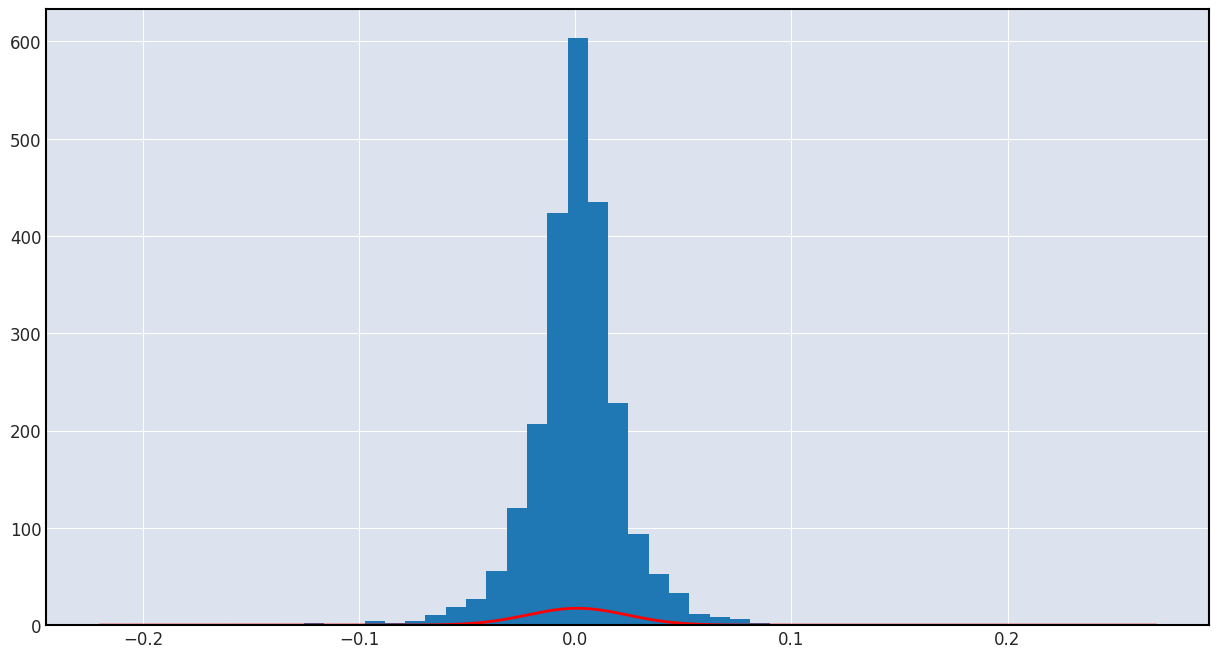

In [30]:
from scipy.stats import norm
mu = fb['LogReturn'].mean()
sigma = fb['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(fb['LogReturn'].min()-0.01, fb['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

fb['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

#### Check for the probability od drops and jumps for a range

In [31]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
for i in range(-5, 6, 1):
    drop = norm.cdf((-i)*0.05, mu220, sigma220)
    jump = norm.cdf(i*0.05, mu220, sigma220)
    print('The probability of %d percent drop is = %f & The probability of %d percent jump is = %f' % (i*5, round(drop,2), -i*5, round(jump,2)))

The probability of -25 percent drop is = 0.420000 & The probability of 25 percent jump is = 0.090000
The probability of -20 percent drop is = 0.380000 & The probability of 20 percent jump is = 0.110000
The probability of -15 percent drop is = 0.330000 & The probability of 15 percent jump is = 0.130000
The probability of -10 percent drop is = 0.290000 & The probability of 10 percent jump is = 0.160000
The probability of -5 percent drop is = 0.250000 & The probability of 5 percent jump is = 0.190000
The probability of 0 percent drop is = 0.220000 & The probability of 0 percent jump is = 0.220000
The probability of 5 percent drop is = 0.190000 & The probability of -5 percent jump is = 0.250000
The probability of 10 percent drop is = 0.160000 & The probability of -10 percent jump is = 0.290000
The probability of 15 percent drop is = 0.130000 & The probability of -15 percent jump is = 0.330000
The probability of 20 percent drop is = 0.110000 & The probability of -20 percent jump is = 0.3800

#### What is the Value At Risk for the Stock?

In [32]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR)

Single day value at risk is:  -0.036914579239954344


#### What is the Mu and Sigma for the stock at 5 and 95 percentile?

In [33]:
# Quantile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.036914579239954344
95% quantile  0.03877559628320785


#### What is the confidence level at various levels?

In [34]:
fb['logReturn'] = np.log(fb['Close'].shift(-1)) - np.log(fb['Close'])
sample_size = fb['logReturn'].shape[0]
sample_mean = fb['logReturn'].mean()
sample_std = fb['logReturn'].std(ddof=1) / sample_size**0.5
# left and right quantile
for i in range(1,10):
    z_left = norm.ppf(0.05*i)
    z_right = norm.ppf((1-0.05*i))
    interval_left = sample_mean+z_left*sample_std
    interval_right = sample_mean+z_right*sample_std
    print('%d percent confidence interval is ' % (100-i*2*5), ( round(interval_left,6), round(interval_right,6)))

90 percent confidence interval is  (0.000151, 0.00171)
80 percent confidence interval is  (0.000323, 0.001538)
70 percent confidence interval is  (0.00044, 0.001421)
60 percent confidence interval is  (0.000532, 0.001329)
50 percent confidence interval is  (0.000611, 0.00125)
40 percent confidence interval is  (0.000682, 0.001179)
30 percent confidence interval is  (0.000748, 0.001113)
20 percent confidence interval is  (0.00081, 0.001051)
10 percent confidence interval is  (0.000871, 0.00099)


# [4️⃣.1️⃣ MACD Forecasting of data using Pandas TA](#4.1)

### Let us do a bit of MACD based Trading indicators


##### Inspiration from Alpharithms -  https://www.alpharithms.com/calculate-macd-python-272222/

#### Created MACD Values

In [35]:

# Get the 26-day EMA of the closing price
k = fb['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = fb['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s
# Add all of our new values for the MACD to the dataframe
fb['macd'] = fb.index.map(macd)
fb['macd_h'] = fb.index.map(macd_h)
fb['macd_s'] = fb.index.map(macd_s)
# View our data
pd.set_option("display.max_columns", None)
print(fb)

                  Date        Open        High         Low       Close  \
Date                                                                     
2012-05-18  2012-05-18   42.049999   45.000000   38.000000   38.230000   
2012-05-21  2012-05-21   36.529999   36.660000   33.000000   34.029999   
2012-05-22  2012-05-22   32.610001   33.590000   30.940001   31.000000   
2012-05-23  2012-05-23   31.370001   32.500000   31.360001   32.000000   
2012-05-24  2012-05-24   32.950001   33.209999   31.770000   33.029999   
...                ...         ...         ...         ...         ...   
2021-09-27  2021-09-27  349.809998  355.149994  347.079987  353.579987   
2021-09-28  2021-09-28  347.970001  349.600006  338.920013  340.649994   
2021-09-29  2021-09-29  343.149994  345.230011  338.880005  339.609985   
2021-09-30  2021-09-30  340.450012  342.799988  338.149994  339.390015   
2021-10-01  2021-10-01  341.609985  345.010010  338.640015  343.010010   

               Volume  Dividends  Sto

#### Calculate MACD through Pandas Technical Analysis Library

In [36]:
try: 
    import pandas_ta as ta
except:
    !pip install pandas_ta
    import pandas_ta as ta



     |████████████████████████████████| 115 kB 4.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=afa5770d6144cc4ae61519499a972eb46be0f711a10907fbaf101d4128073c9e
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [37]:

# Calculate MACD values using the pandas_ta library
fb2.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
# View result
pd.set_option("display.max_columns", None)  # show all columns
print(fb2)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2012-05-18   42.049999   45.000000   38.000000   38.230000  573576400   
2012-05-21   36.529999   36.660000   33.000000   34.029999  168192700   
2012-05-22   32.610001   33.590000   30.940001   31.000000  101786600   
2012-05-23   31.370001   32.500000   31.360001   32.000000   73600000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2021-09-27  349.809998  355.149994  347.079987  353.579987   15205800   
2021-09-28  347.970001  349.600006  338.920013  340.649994   21710300   
2021-09-29  343.149994  345.230011  338.880005  339.609985   14452200   
2021-09-30  340.450012  342.799988  338.149994  339.390015   16547100   
2021-10-01  341.609985  345.010010  338.640015  343.010010   14789507   

            Dividends  Splits          42         

### Let us do some plotting

In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# calculate MACD values
fb2.ta.macd(close='close', fast=12, slow=26, append=True)
# Force lowercase (optional)
fb2.columns = [x.lower() for x in fb2.columns]
# Construct a 2 x 1 Plotly figure
fig = make_subplots(rows=2, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=fb2.index,
        y=fb2['open'],
        line=dict(color='lawngreen', width=1),
        name='open',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=fb2.index,
        open=fb2['open'],
        high=fb2['high'],
        low=fb2['low'],
        close=fb2['close'],
        increasing_line_color='lawngreen',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=fb2.index,
        y=fb2['macd_12_26_9'],
        line=dict(color='lawngreen', width=2),
        name='macd',
        # showlegend=False,
        legendgroup='2',
    ), row=2, col=1
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=fb2.index,
        y=fb2['macds_12_26_9'],
        line=dict(color='mediumblue', width=2),
        # showlegend=False,
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)
# Colorize the histogram values
colors = np.where(fb2['macdh_12_26_9'] < 0, '#000', 'lawngreen')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=fb2.index,
        y=fb2['macdh_12_26_9'],
        name='histogram',
        marker_color=colors,
    ), row=2, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='linen',
    # Font Families
    font_family='Monospace',
    font_color='mediumblue',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(height=800,width=1200,dragmode='lasso')
fig.show()

# [5️⃣ Let us do a financial ratios calculation using FINTA library](#5)

* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'


In [39]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    !pip install finta backtesting
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover


     |████████████████████████████████| 174 kB 7.1 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.2-py3-none-any.whl size=173671 sha256=d9a02a8a2a9a1063a18eeb0caa09d1162378d1dac189c146048bdf41648f0406
  Stored in directory: /root/.cache/pip/wheels/22/0e/30/e458272563bdbea1905391b5bb5702e2001a769544d9cb2df3
Successfully built backtesting


Loading BokehJS ...

In [40]:
fin_fb = pd.read_csv('../input/facebook-stock-data-live-and-latest/FB_stock_history.csv', index_col="Date", parse_dates=True)
print(fin_fb.head())
ohlc=fin_fb
print(TA.SMA(ohlc, 42))
#will return Pandas Series object with "Awesome oscillator" values
TA.AO(ohlc)
#expects ["volume"] column as input
print(TA.OBV(ohlc))
#will return Series with Bollinger Bands columns [BB_UPPER, BB_LOWER]
print(TA.BBANDS(ohlc))
#will return Series with calculated BBANDS values but will use KAMA instead of MA for calculation, other types of Moving Averages are allowed as well.
print(TA.BBANDS(ohlc, MA=TA.KAMA(ohlc, 20)))

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400          0   
2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700          0   
2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600          0   
2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000          0   
2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200          0   

            Stock Splits  
Date                      
2012-05-18             0  
2012-05-21             0  
2012-05-22             0  
2012-05-23             0  
2012-05-24             0  
Date
2012-05-18           NaN
2012-05-21           NaN
2012-05-22           NaN
2012-05-23           NaN
2012-05-24           NaN
                 ...    
2021-09-27    364.872620
2021-09-28    364.451906
2021-09-29    364.054525
2021-09-30    363.75

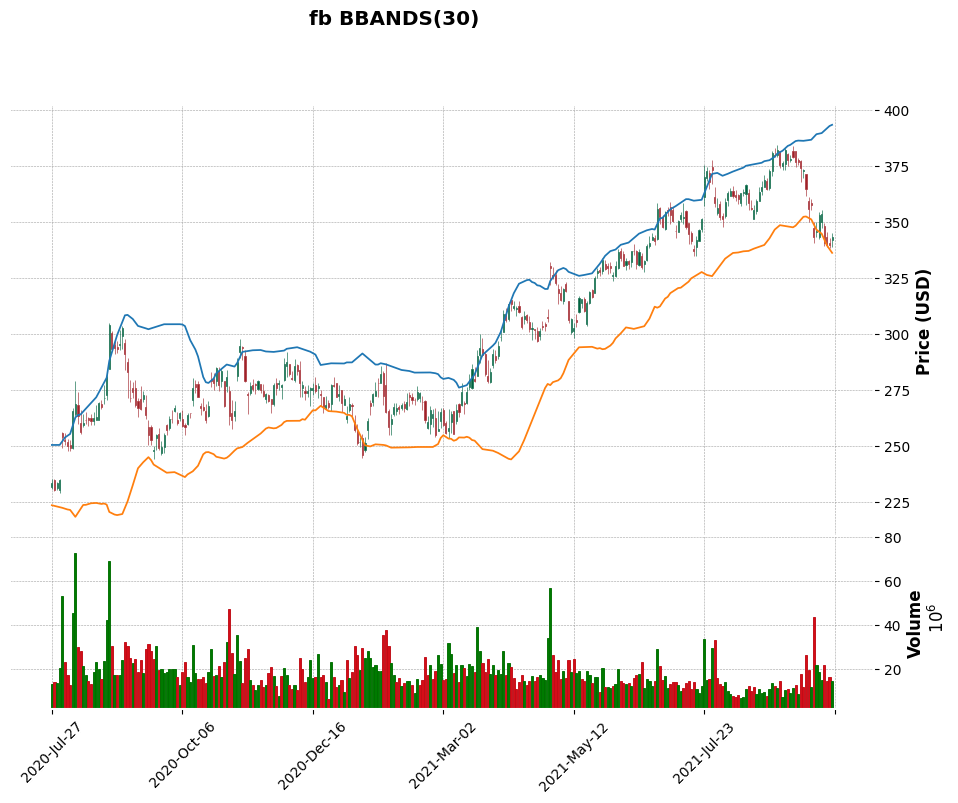

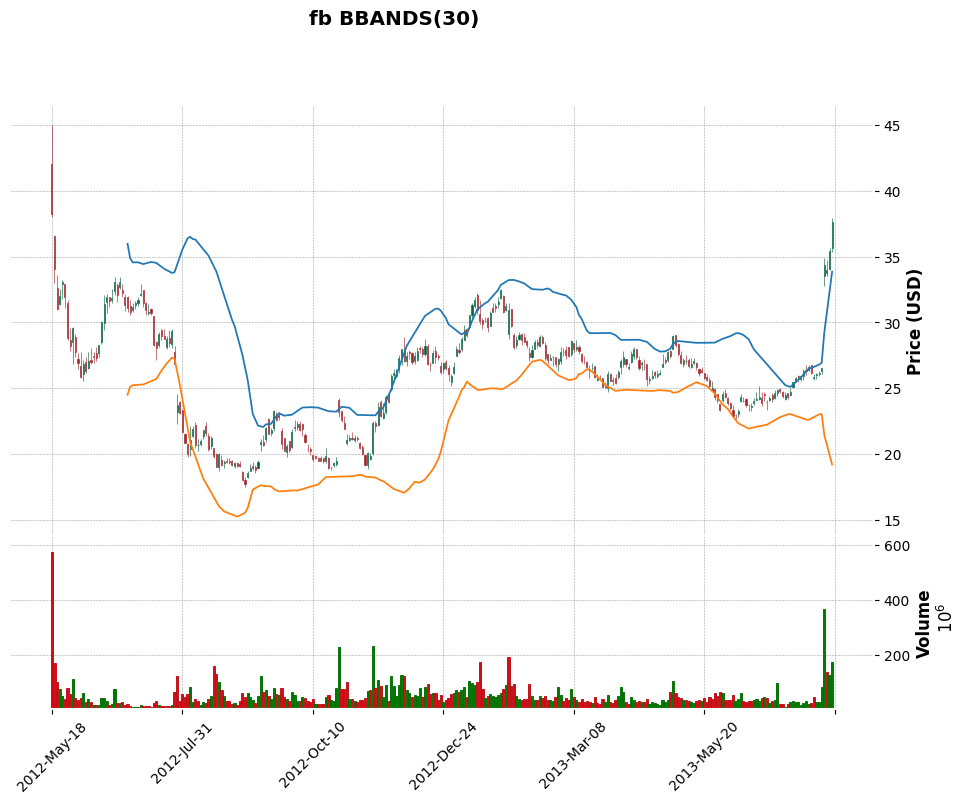

In [41]:

# calc bol band
bbands = TA.BBANDS(fin_fb, 30)

# cherry pick what to show on the chart
bands_plot = pd.concat([bbands.BB_UPPER, bbands.BB_LOWER], axis=1)

apd = mpf.make_addplot(bands_plot.tail(300))

mpf.plot(fin_fb.tail(300), type='candle', style='charles',
        title='fb BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

apd = mpf.make_addplot(bands_plot.head(300))

mpf.plot(fin_fb.head(300), type='candle', style='charles',
        title='fb BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

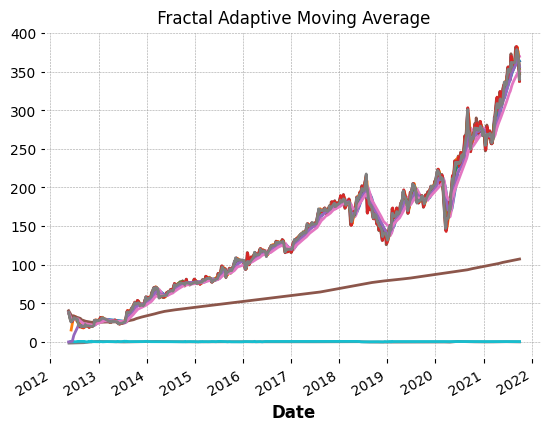

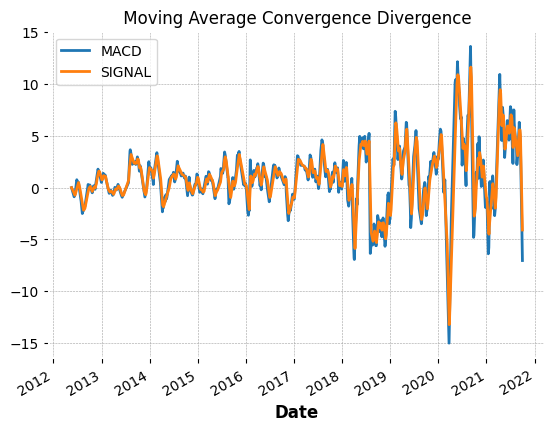

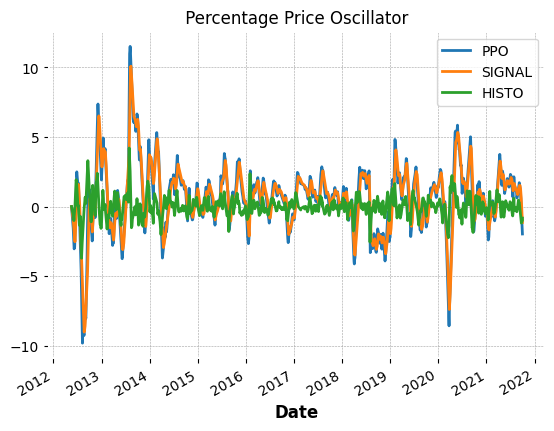

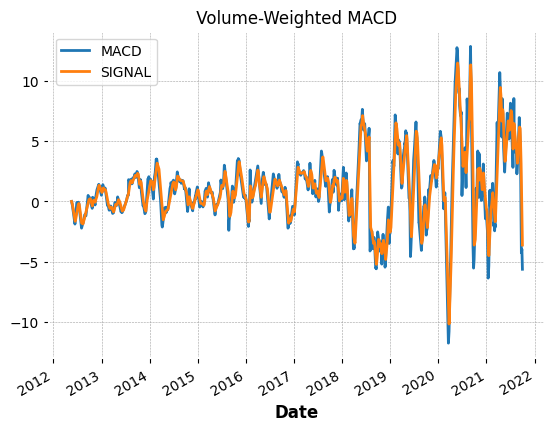

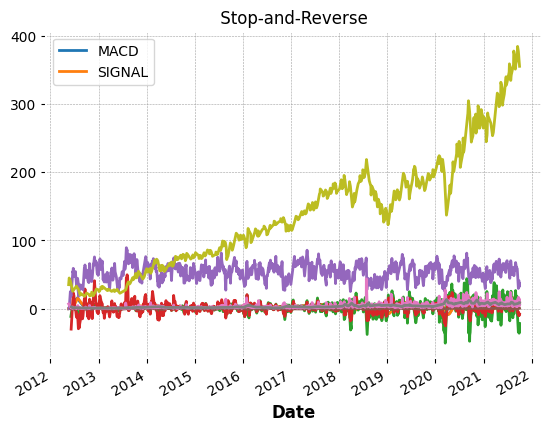

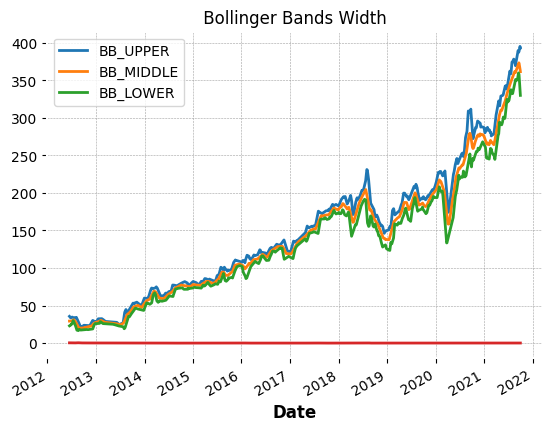

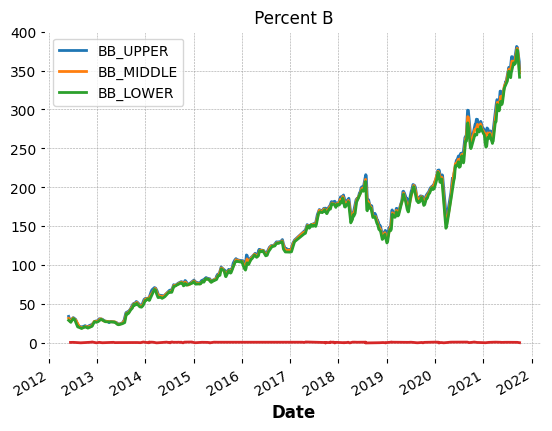

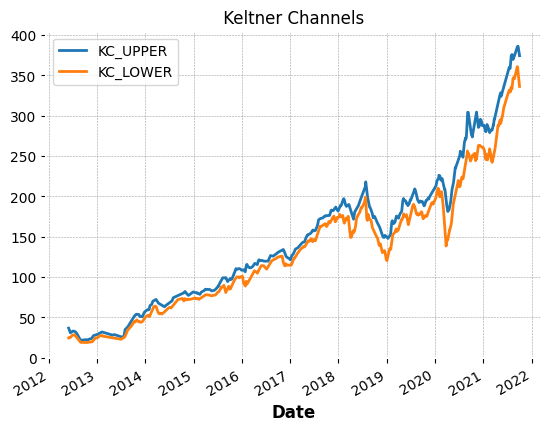

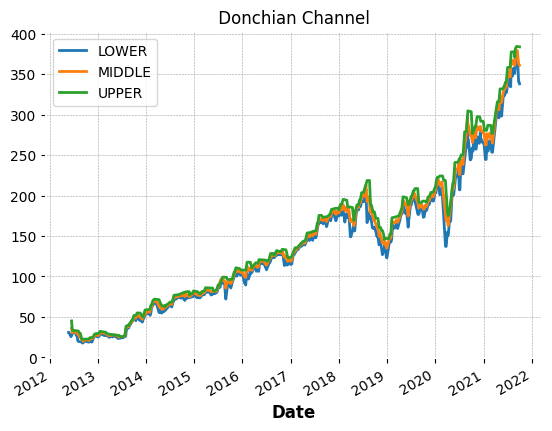

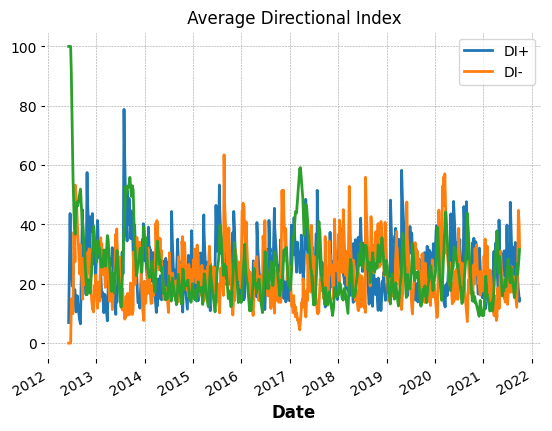

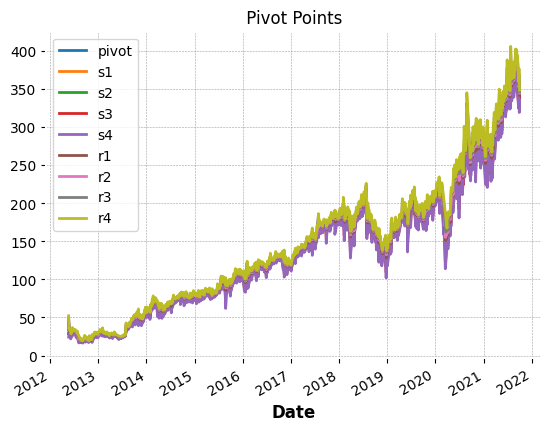

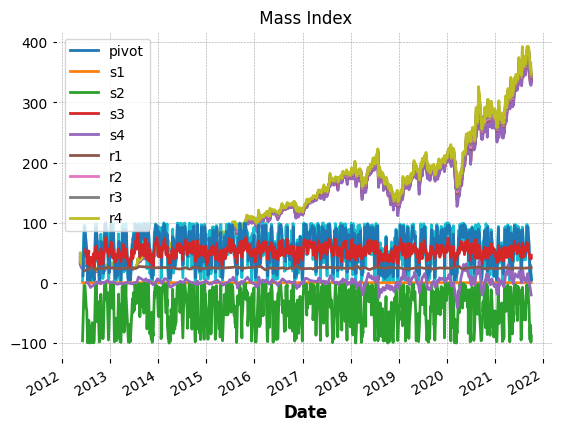

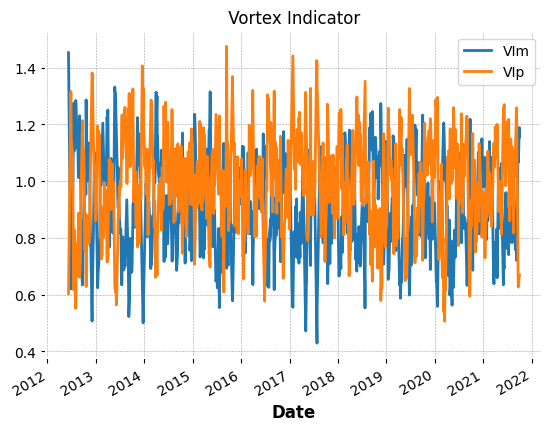

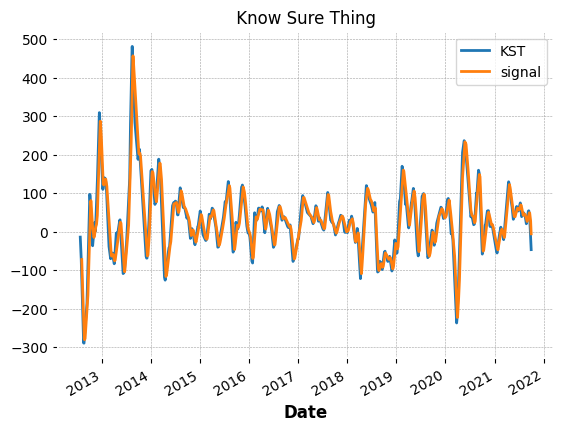

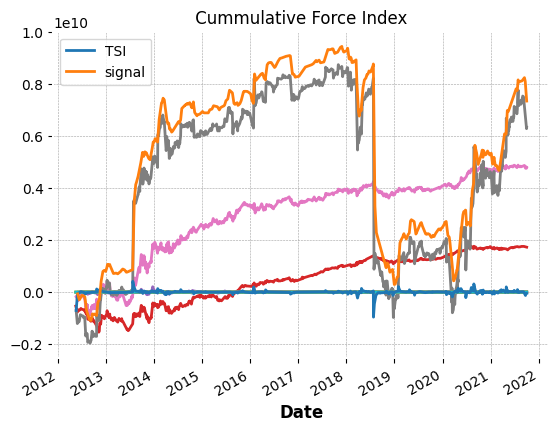

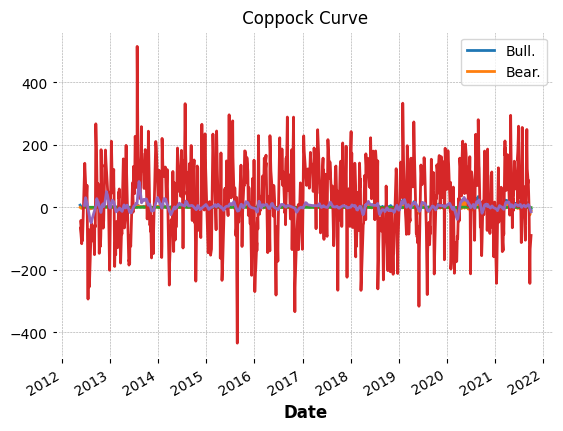

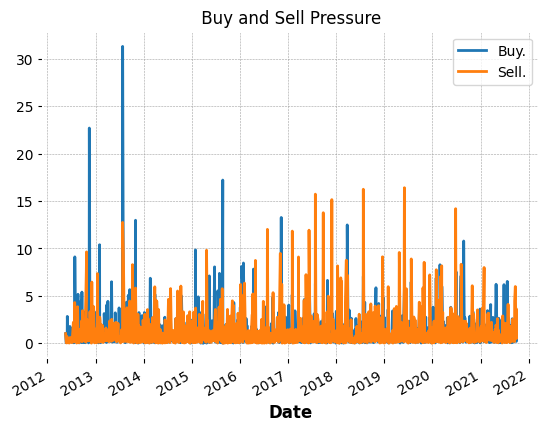

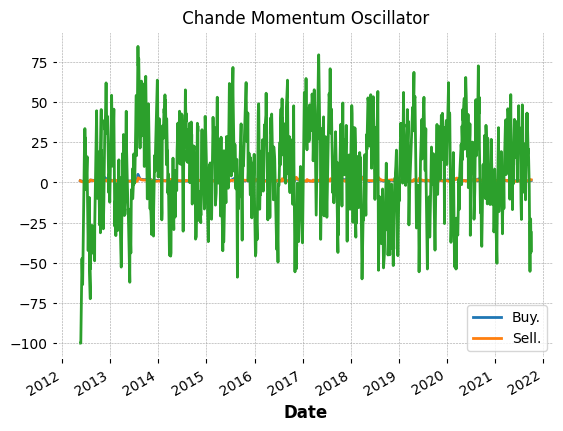

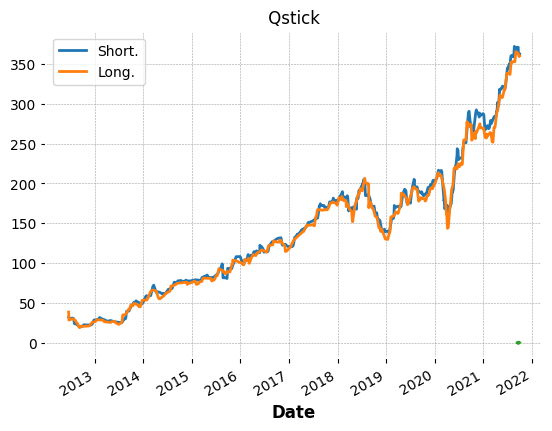

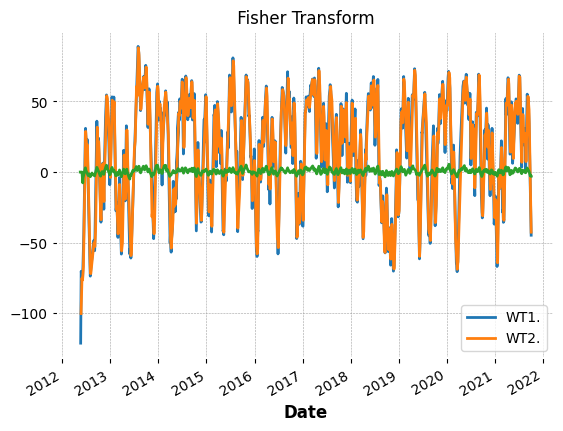

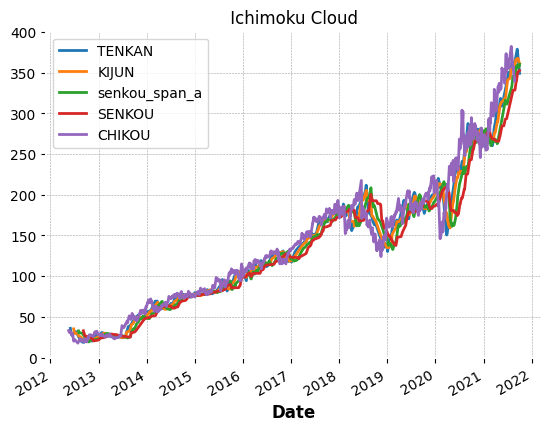

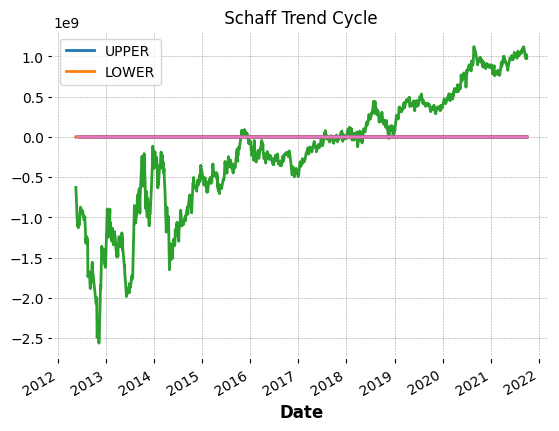

In [42]:

function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 ' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 ' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 ' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 ' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 ' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}

for key, value in function_dict .items():
    function_name = "TA." + value + "(ohlc).plot(title='" + key + "')"
    result = eval(function_name)


## Use backtesting library to do a simple data backtesting

In [43]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

In [44]:
bt = Backtest(ohlc, DemaCross,
              cash=10000, commission=0.025)

### Let us check the Backtesting summary

In [45]:
bt.run()

Start                     2012-05-18 00:00:00
End                       2021-10-01 00:00:00
Duration                   3423 days 00:00:00
Exposure Time [%]                   99.279356
Equity Final [$]                120588.527384
Equity Peak [$]                  134909.73997
Return [%]                        1105.885274
Buy & Hold Return [%]              797.227345
Return (Ann.) [%]                   30.469931
Volatility (Ann.) [%]               48.685573
Sharpe Ratio                         0.625851
Sortino Ratio                        1.302159
Calmar Ratio                         0.657042
Max. Drawdown [%]                  -46.374436
Avg. Drawdown [%]                   -4.775605
Max. Drawdown Duration      533 days 00:00:00
Avg. Drawdown Duration       28 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                    1602.135014
Worst Trade [%]                   1104.909748
Avg. Trade [%]                    

## It is very evidend that albeit some volatility, it is a pretty solid long term stock with outstanding run over last 5 years.

> 

# [6️⃣ Let us do a financial ratios calculation](#6)


### Let us try Sharpe Ratio

In [46]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.018 #1.8% risk free rate
fb.columns
temp_df=fb[['Close']]
sharpes = temp_df.apply(sharpe_ratio, args=(N,rf,))#,axis=0)
print("The Sharpe Ratio for the stock i =" , round(sharpes[0],2))

The Sharpe Ratio for the stock i = 26.37


In [47]:
def calculate_sortino(series,N, rf):
    expected_return = np.mean(series)
    below_avg = [i for i in series if i < expected_return]
    risk_free = rf
    sortino = (expected_return - risk_free) / np.std(below_avg)
    return round(sortino, 2)

sortinos = temp_df.apply(calculate_sortino, args=(N,rf,))
print("The Sortino Ratio for the stock is =" , round(sortinos[0],2))

The Sortino Ratio for the stock is = 3.83


In [48]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


max_drawdowns = temp_df.apply(max_drawdown,axis=0)
print("The max_drawdowns Ratio for the stock is =" , round(max_drawdowns[0],2))

The max_drawdowns Ratio for the stock is = 0.0


## Try Bollinger Bands Price

In [49]:
def bollinger_bands_price(price):
    up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bollinger_bands_price = (price['Close'] - low) / (up - low)
    return bollinger_bands_price

# [7️⃣ Let us do a bit of forecasting using Regression ](#7)

 Some inspiration from the following post as well
*  [MLQ.AI](https://www.mlq.ai/price-prediction-with-linear-regression/)


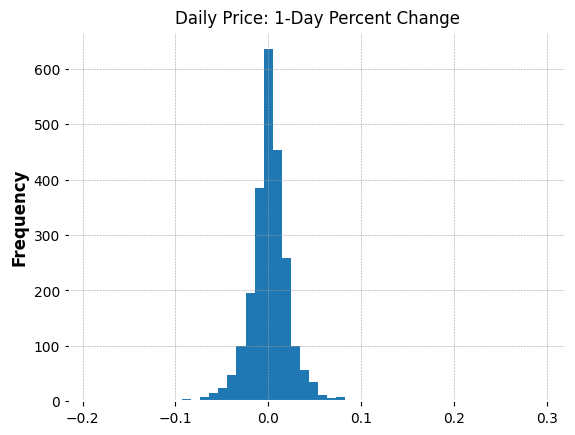

In [50]:
# Histogram of the daily price change percent of 'Close' price
fb['Close'].pct_change().plot.hist(bins=50)
plt.title('Daily Price: 1-Day Percent Change')
plt.show() 

In [51]:
# Create 5-day % changes of Last for the current day, and 5 days in the future
fb['5d_future_close'] = fb['Close'].shift(-5)
fb['5d_close_future_pct'] = fb['5d_future_close'].pct_change(5)
fb['5d_close_pct'] = fb['Close'].pct_change(5)

In [52]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = fb[['5d_close_pct', '5d_close_future_pct']].corr()

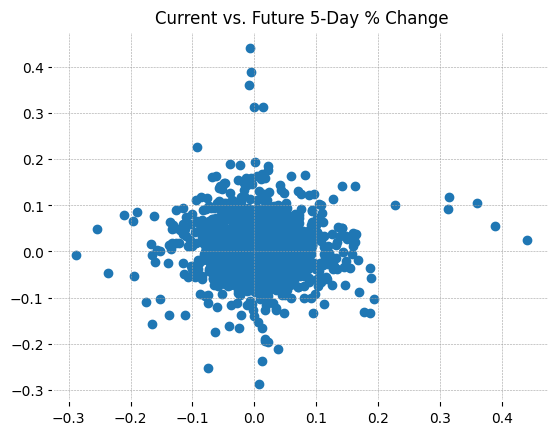

In [53]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(fb['5d_close_pct'], fb['5d_close_future_pct'])
plt.title('Current vs. Future 5-Day % Change')
plt.show()

In [54]:
# a list of the feature names for later
feature_names = ['5d_close_pct']  

In [55]:
# Drop all na values
fb = fb.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = fb[feature_names]
targets = fb['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = fb[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct
5d_close_future_pct             1.000000     -0.132197
5d_close_pct                   -0.132197      1.000000


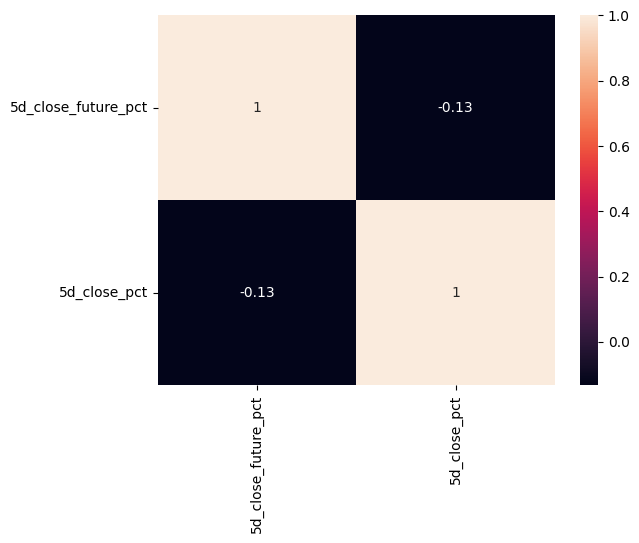

In [56]:
import seaborn as sns
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90) # fix ticklabel directions
plt.show() # show the plot

In [57]:
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 80% of the total number of rows
#.shape gives us the number of rows in our data, and convert to an int
train_size = int(0.8 * features.shape[0])

# split features and targets using python indexing
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1855, 2) (1484, 2) (371, 2)


In [58]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     20.12
Date:                 Sun, 03 Oct 2021   Prob (F-statistic):           7.85e-06
Time:                         14:29:38   Log-Likelihood:                 2684.9
No. Observations:                 1484   AIC:                            -5366.
Df Residuals:                     1482   BIC:                            -5355.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0050      0.001    

# [8️⃣ Let us do a Forecasting using FB Prophet ](#8)


# Use of Facebook Prophet for Stock Forecasting
## Facebook Stock forecast 
* This kernel uses Facebook Prophet (which uses SKLEARN) and Neural Prophet (which uses PyTorch) libaries to predict stocks. This kernel splits the NASDAQ stocks into ten folds and creates 10 output files each for the stocks in a PDF Format

###  Yahoo! DataReader Download
<div class="alert alert-block alert-info">
<b>Step-1:</b> Download data using Yahoo! Finance Data Reader</div>

###  Facebook Prophet Models
<div class="alert alert-block alert-info">
<b>Step-2:</b> Build Facebook Prophet Input dataset</div>
<div class="alert alert-block alert-info">
<b>Step-3:</b> Run Prophet Model</div>
<div class="alert alert-block alert-info">
<b>Step-4:</b> Generate Model Visualization </div>
<div class="alert alert-block alert-info">
<b>Step-5:</b> Generate the Image Files </div>
<div class="alert alert-block alert-info">
<b>Step-6:</b> Consolidate Image Files for Facebook Prophet Model </div>

###  Neural Prophet Models
<div class="alert alert-block alert-warning">
<b>Step-7-11:</b> Repeat Steps 2-6 for Neural Prophet Model </div>



In [59]:
try:
    from fbprophet.plot import plot_plotly
    from fbprophet import Prophet
except:
    !pip install fbprophet    # install Faceboo Prophet
    from fbprophet.plot import plot_plotly
    from fbprophet import Prophet
    

In [60]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet

In [61]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

In [62]:
def fb_prophet_plot(df, param, stock):
    # Check the dataset
    #df.head()
    # Create Dataset based on the FB Prophet standard ds/y
    df2 = pd.DataFrame([], columns = ['ds', 'y'])
    df2.columns=['ds','y']
    df2['ds']=pd.to_datetime(df.index,format='%Y-%m')
    #Assign the Parameter
    df2['y']=df[param].values
    #check the new DS
    #df2.head()
    
    #create a new Prophet Model
    model=Prophet(interval_width=0.95,yearly_seasonality=True)
    
    #Fit the Model
    model.fit(df2)
    #Predict the future
    future=model.make_future_dataframe(periods=50, freq='MS')
    forecast=model.predict(future)
    #Save the predicted model
    preds= forecast['yhat'][:-50]
    #plot the graph
    title = 'FB Prophet predictions for ==> ' + stock
    plt.figure(figsize=(16,8))
    plt.plot(df2.ds,preds,color='#555555',label=' Predictions')
    plt.plot(df2.ds,df2.y,color='#1155FF',label='Actual')
    plt.title(title)
    plt.legend()
    plt.show()
    figure=model.plot(forecast,xlabel='Date',ylabel='Price')
    figure.set_size_inches(16,8)
    plt.title(title)
    model.plot_components(forecast)
    plt.show()

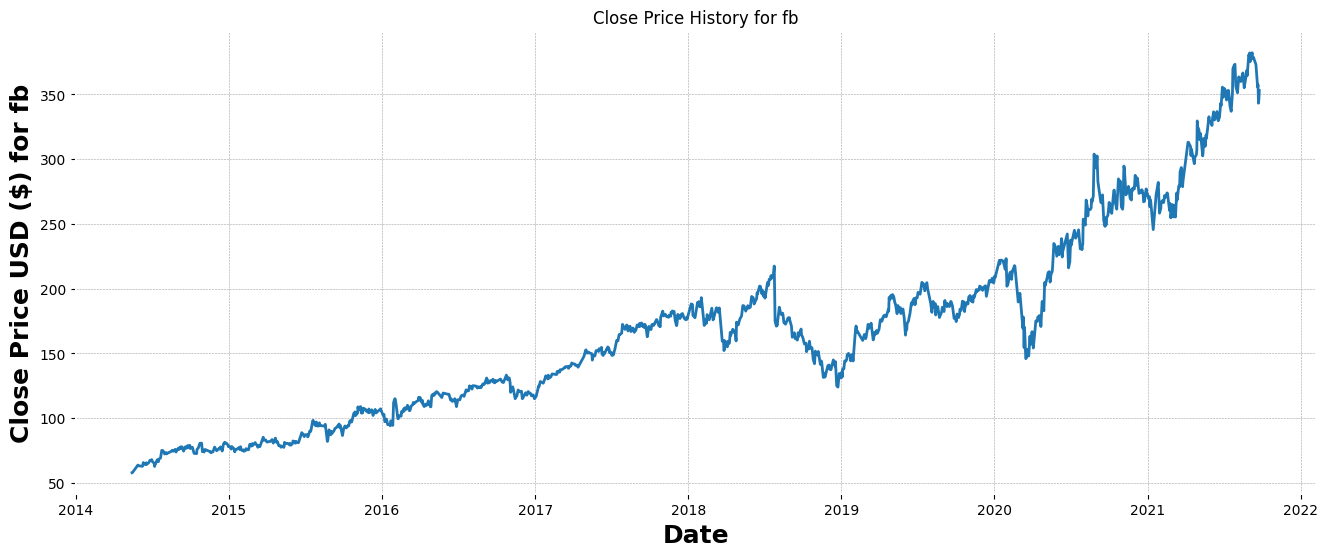

Initial log joint probability = -18.2492
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5353.26    0.00922098       1117.09           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5508.98    0.00962113       430.241           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5542.45   0.000780154       183.483      0.9156      0.9156      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5559.61    0.00377729       860.382           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     425       5561.32   0.000120422       111.314   9.469e-07       0.001      552  LS failed, Hessian reset 
     480       5563.74   8.56257e-05    

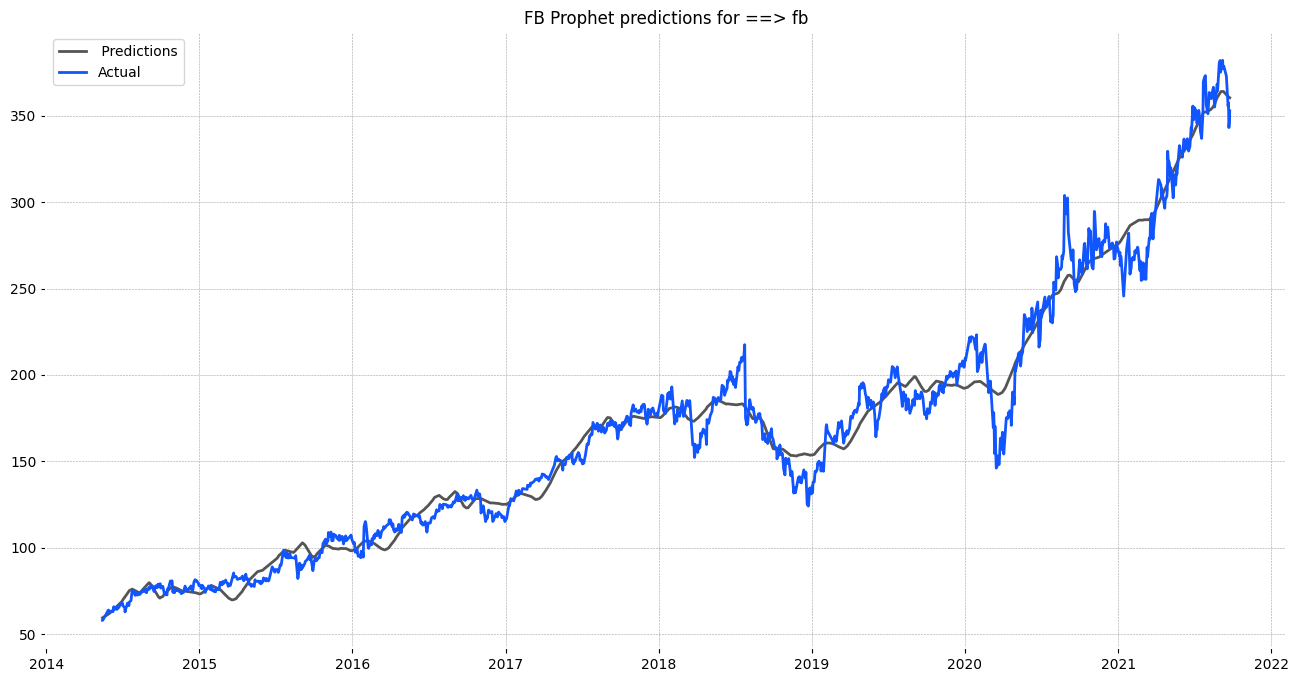

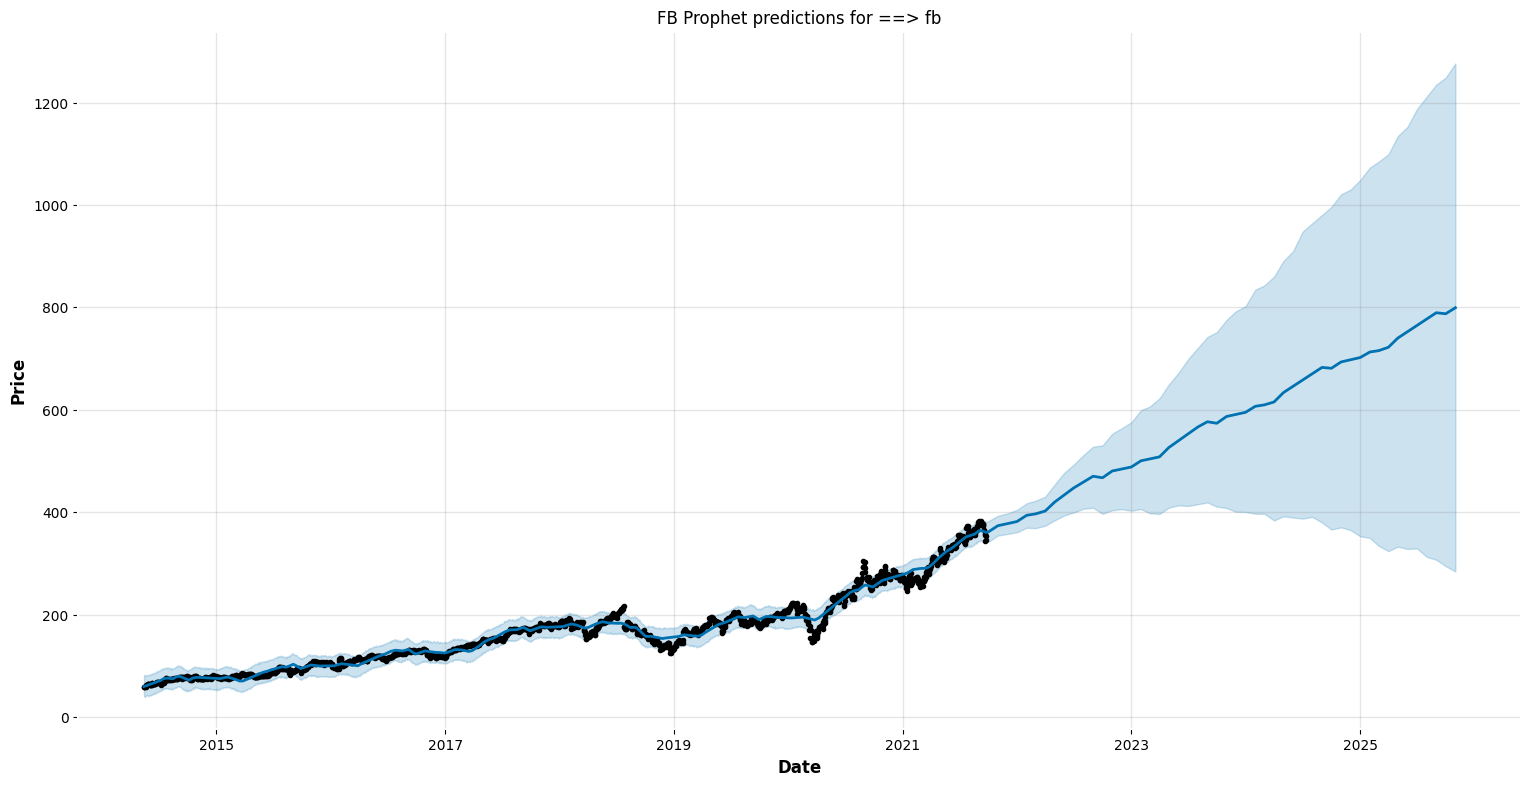

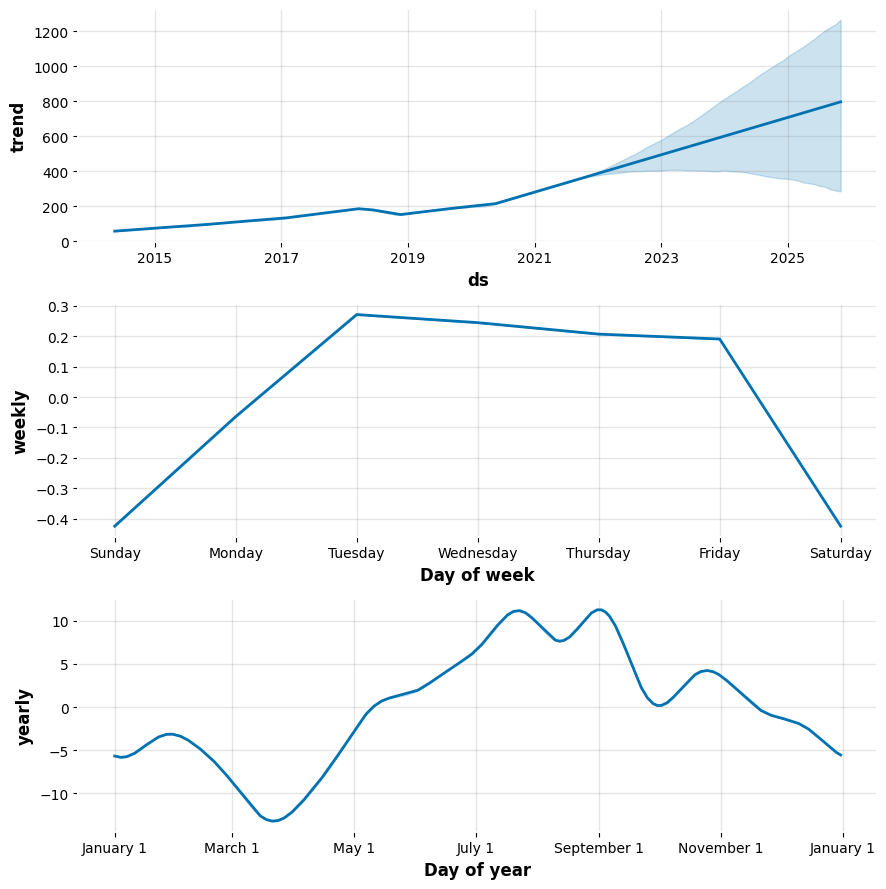

All forecasting done!


In [63]:
plot_close_val(fb, 'Close', 'fb') # Plot the Closing Price
fb_prophet_plot(fb, 'Close', 'fb')

print("All forecasting done!")

# THIS IS A WORK IN PROGRESS 